In [9]:
from pathlib import Path
root_path = Path.cwd().parent.parent.parent
goal_path = root_path / 'datas/실습/input/딥러닝 실습/'
goal_path

WindowsPath('C:/Users/student/Desktop/깃/TIL/datas/실습/input/딥러닝 실습')

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv(goal_path/'bmi.csv')

# 키와 몸무게 정규화
df['height'] /= 200
df['weight'] /= 100


# label 컬럼 변환 - thin[1, 0, 0]/normal[0, 1, 0]/fat [0, 0, 1]
bclass = {"thin": [1, 0, 0] , "normal":[0, 1, 0], "fat": [0, 0, 1]}
df["label_pat"] = df["label"].apply(lambda x: np.array(bclass[x]))

# 학습데이터와 테스트 데이터 분류
test_df = df[15000:20000]
test_pat= test_df[["weight", "height"]]
test_ans = list(test_df["label_pat"])

X = tf.placeholder(tf.float32, [None, 2]) #키, 몸부게 데이터 담을 placeholder  선언
Y = tf.placeholder(tf.float32, [None, 3])   #정답 레이블 데이터 담을 placeholder  선언

W = tf.Variable(tf.zeros([2, 3])) 
b = tf.Variable(tf.zeros([3])) 

y = tf.nn.softmax(tf.matmul(X, W) + b)  #소프트맥스 회귀 정의
cross_entropy = -tf.reduce_sum(Y * tf.log(y))  #오차함수 - 교차 엔트로피
train= tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)  #경사하강법으로 학습
 
# 예측값, 정답률 계산
predict = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
for step in range(3501):
    i = (step*100) % 14000
    rows = df[i+1:i+1+100]
    x_pat = rows[["weight", "height"]]
    y_ans =  list(rows["label_pat"])
    sess.run(train, feed_dict={X: x_pat  , Y: y_ans })
    if step%500  == 0 :
        cre = sess.run(cross_entropy, feed_dict={X: x_pat  , Y: y_ans })
        acc = sess.run(accuracy , feed_dict={X: test_pat  , Y: test_ans })
        print("Epoch=", step, "오차=", cre, "정확률(평균)=", acc)

Epoch= 0 오차= 108.66269 정확률(평균)= 0.3242
Epoch= 500 오차= 57.58866 정확률(평균)= 0.8904
Epoch= 1000 오차= 45.02092 정확률(평균)= 0.898
Epoch= 1500 오차= 41.65434 정확률(평균)= 0.9566
Epoch= 2000 오차= 34.664024 정확률(평균)= 0.943
Epoch= 2500 오차= 34.287025 정확률(평균)= 0.9674
Epoch= 3000 오차= 26.880764 정확률(평균)= 0.9726
Epoch= 3500 오차= 29.59067 정확률(평균)= 0.9728


In [22]:
!pip install keras

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping


df = pd.read_csv(goal_path/'bmi.csv')

#키와 몸무게 정규화
df["height"] /= 200
df["weight"] /= 100

X = df[["weight", "height"]].as_matrix()

#label 컬럼 변환 - thin[1, 0, 0]/normal[0, 1, 0]/fat [0, 0, 1]
bclass = {"thin": [1, 0, 0] , "normal":[0, 1, 0], "fat": [0, 0, 1]}
Y = np.empty((20000, 3))
for i, v in enumerate(df["label"]):
    Y[i] = bclass[v]
 
#학습데인터 , 테스트 데이터 분리
X_train, Y_train = X[1:15001], Y[1:15001]
X_test, Y_test = X[15001:20001], Y[15001:20001]

model = Sequential()  #모델 객체 생성
model.add(Dense(512, input_shape=(2, )))    #Dense(노드 수 , ....) 층을 의미하는 객체
model.add(Activation('relu'))   # 활성화 함수
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=2)], verbose=1)
                    
score = model.evaluate(X_test, Y_test)
print("loss=", score[0])
print("accuracy=", score[1])

C:\Users\student\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 95us/step - loss: 0.5198 - accuracy: 0.7910 - val_loss: 0.2893 - val_accuracy: 0.9020
Epoch 2/20
13500/13500 [==============================] - 1s 72us/step - loss: 0.2497 - accuracy: 0.9030 - val_loss: 0.1769 - val_accuracy: 0.9373
Epoch 3/20
13500/13500 [==============================] - 1s 67us/step - loss: 0.1945 - accuracy: 0.9205 - val_loss: 0.1277 - val_accuracy: 0.9580
Epoch 4/20
13500/13500 [==============================] - 1s 77us/step - loss: 0.1659 - accuracy: 0.9276 - val_loss: 0.1389 - val_accuracy: 0.9380
Epoch 5/20
4999/4999 [==============================] - 0s 43us/step
loss= 0.16440339221921438
accuracy= 0.911382257938385


In [40]:
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = numpy.loadtxt(goal_path/'ThoraricSurgery.csv', delimiter=',')

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행).
model = Sequential()   
# 첫 번째 은닉층에 input_dim을 적어 줌으로써 첫 번째 Dense가 은닉층 + 입력층의 역할을 겸합니다.
# 데이터에서 17개의 값을 받아 은닉층의 30개 노드로 보낸다 
model.add(Dense(30, input_dim=17, activation='relu'))  #activation : 출력층으로 전달할 때 사용할 활성화 함수
model.add(Dense(1, activation='sigmoid'))  #출력층의 노드 수는 1개, 최종 출력 값에 사용될 활성화 함수

# 딥러닝을 실행합니다. (오차 함수 :  평균 제곱 오차 함수 사용)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10)

# 결과를 출력합니다.
print('\n Accuracy: %.4f'% (model.evaluate(X, Y)[1]))

Epoch 1/30
470/470 [==============================] - 0s 507us/step - loss: 0.8003 - accuracy: 0.1894
Epoch 2/30
470/470 [==============================] - 0s 85us/step - loss: 0.6898 - accuracy: 0.2936
Epoch 3/30
470/470 [==============================] - 0s 76us/step - loss: 0.1780 - accuracy: 0.8128
Epoch 4/30
470/470 [==============================] - 0s 79us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 131us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 81us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 79us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 110us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 106us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 80us/step - loss: 0.1489 - ac

In [42]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)                   # seed 값 생성
tf.set_random_seed(seed)

dataset = numpy.loadtxt(goal_path/'pima-indians-diabets.csv', delimiter=',')               # 데이터 로드
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()                                                # 모델의 설정
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',   optimizer='adam',      metrics=['accuracy'])   # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=10)                                # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))                # 결과 출력

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
768/768 [==============================] - 0s 483us/step - loss: 2.4394 - accuracy: 0.5130
Epoch 2/200
768/768 [==============================] - 0s 108us/step - loss: 0.9124 - accuracy: 0.6367
Epoch 3/200
768/768 [==============================] - 0s 94us/step - loss: 0.7963 - accuracy: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 113us/step - loss: 0.7416 - accuracy: 0.6107
Epoch 5/200
768/768 [==============================] - 0s 99us/step - loss: 0.6802 - accuracy: 0.6406
Epoch 6/200
768/768 [==============================] - 0s 100us/step - loss: 0.6489 - accuracy: 0.6289
Epoch 7/200
768/768 [==============================] - 0s 97us/step - loss: 0.6379 - accuracy: 0.6471
Epoch 8/200
768/768 [==============================] - 0s 106us/step - loss: 0.6384 - accuracy: 0.6250
Epoch 9/200
768/768 [==============================] - 0s 103us/step - loss: 0.6306 -

Epoch 77/200
768/768 [==============================] - 0s 117us/step - loss: 0.5174 - accuracy: 0.7422
Epoch 78/200
768/768 [==============================] - 0s 105us/step - loss: 0.5119 - accuracy: 0.7383
Epoch 79/200
768/768 [==============================] - 0s 106us/step - loss: 0.5138 - accuracy: 0.7591
Epoch 80/200
768/768 [==============================] - 0s 99us/step - loss: 0.5088 - accuracy: 0.7513
Epoch 81/200
768/768 [==============================] - 0s 97us/step - loss: 0.5185 - accuracy: 0.7474
Epoch 82/200
768/768 [==============================] - 0s 103us/step - loss: 0.5032 - accuracy: 0.7552
Epoch 83/200
768/768 [==============================] - 0s 108us/step - loss: 0.5218 - accuracy: 0.7357
Epoch 84/200
768/768 [==============================] - 0s 105us/step - loss: 0.5052 - accuracy: 0.7422
Epoch 85/200
768/768 [==============================] - 0s 99us/step - loss: 0.5030 - accuracy: 0.7474
Epoch 86/200
768/768 [==============================] - 0s 100us/st

Epoch 155/200
768/768 [==============================] - 0s 97us/step - loss: 0.4739 - accuracy: 0.7695
Epoch 156/200
768/768 [==============================] - 0s 95us/step - loss: 0.4744 - accuracy: 0.7630
Epoch 157/200
768/768 [==============================] - 0s 97us/step - loss: 0.4821 - accuracy: 0.7773
Epoch 158/200
768/768 [==============================] - 0s 98us/step - loss: 0.4717 - accuracy: 0.7708
Epoch 159/200
768/768 [==============================] - 0s 101us/step - loss: 0.4729 - accuracy: 0.7630
Epoch 160/200
768/768 [==============================] - 0s 99us/step - loss: 0.4783 - accuracy: 0.7630
Epoch 161/200
768/768 [==============================] - 0s 97us/step - loss: 0.4740 - accuracy: 0.7695
Epoch 162/200
768/768 [==============================] - 0s 97us/step - loss: 0.4694 - accuracy: 0.7760
Epoch 163/200
768/768 [==============================] - 0s 96us/step - loss: 0.4663 - accuracy: 0.7682
Epoch 164/200
768/768 [==============================] - 0s 97u

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


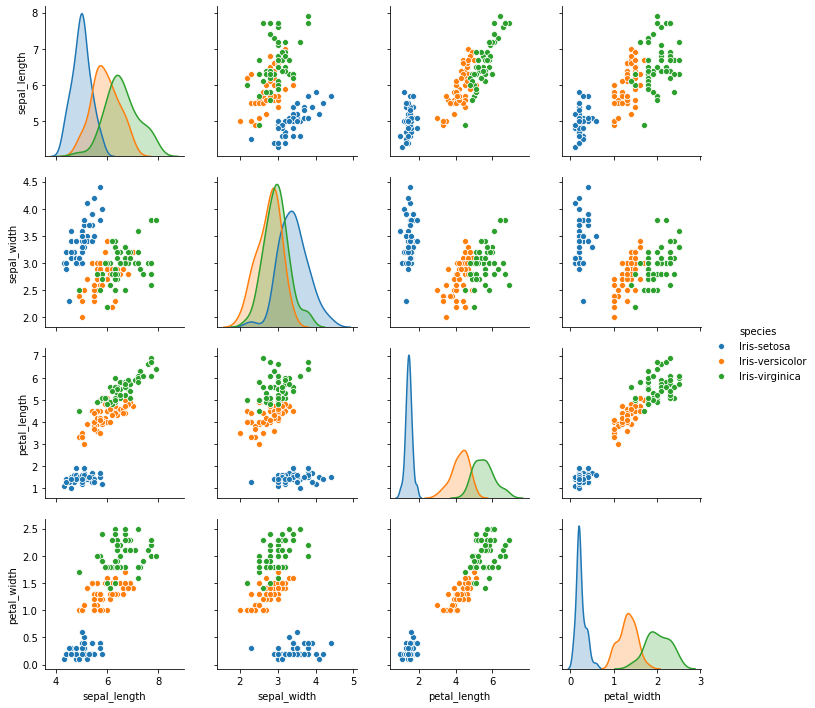

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 1.6259 - accuracy: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 778us/step - loss: 1.1404 - accuracy: 0.4867
Epoch 3/50
150/150 [==============================] - 0s 831us/step - loss: 0.9411 - accuracy: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 745us/step - loss: 0.7898 - accuracy: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 804us/step - loss: 0.6669 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 718us/step - loss: 0.5636 - accuracy: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 725us/step - loss: 0.5080 - accuracy: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 718us/step - loss: 0.4558 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 738us/step - loss: 0.4287 - accuracy: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 718us/step - loss: 0.4070 

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(goal_path/'iris.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df.head())

sns.pairplot(df, hue='species')  #속성별 연관성 파악
plt.show()

dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

from sklearn.preprocessing import LabelEncoder     
e = LabelEncoder()     # array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])가 array([1,2,3])로 변환
e.fit(Y_obj)
Y = e.transform(Y_obj)

from keras.utils import np_utils
# array([1,2,3])가 다시 array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])로 원-핫 인코딩(one-hot-encoding) 변환
Y_encoded = np_utils.to_categorical(Y)

from keras.models import Sequential
from keras.layers.core import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

model = Sequential() # 모델의 설정
model.add(Dense(16, input_dim=4, activation='relu'))
#최종 출력 값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노드 수를 3으로 설정
model.add(Dense(3, activation='softmax'))

# 모델 컴파일(다중 분류에 적절한 오차 함수인 categorical_crossentropy를 사용, 최적화 함수로 adam 사용)
model.compile(loss='categorical_crossentropy',    optimizer='adam',    metrics=['accuracy'])

# 모델 실행(한 번에 입력되는 값은 1개, 전체 샘플이 50회 반복될 때까지 실험을 진행
model.fit(X, Y_encoded, epochs=50, batch_size=1)   

print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))   # 결과 출력

In [45]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=02ef9e9847d8d48627c6327356755ac844fd729e45ebdc1e99e4e1a7c864317d
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [52]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv(goal_path/'sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]
#print(Y_obj.unique())

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환

model = Sequential()              # 모델 설정
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',   optimizer='adam',    metrics=['accuracy'])  # 모델 컴파일

hist = model.fit(X, Y, epochs=200, batch_size=5)                      # 모델 실행
# print(hist)
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))     # 결과 출력

Epoch 1/200
208/208 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.4519
Epoch 2/200
208/208 [==============================] - 0s 216us/step - loss: 0.2459 - accuracy: 0.5385
Epoch 3/200
208/208 [==============================] - 0s 173us/step - loss: 0.2427 - accuracy: 0.5433
Epoch 4/200
208/208 [==============================] - 0s 177us/step - loss: 0.2393 - accuracy: 0.5481
Epoch 5/200
208/208 [==============================] - 0s 216us/step - loss: 0.2329 - accuracy: 0.5529
Epoch 6/200
208/208 [==============================] - 0s 192us/step - loss: 0.2240 - accuracy: 0.5913
Epoch 7/200
208/208 [==============================] - 0s 192us/step - loss: 0.2156 - accuracy: 0.6587
Epoch 8/200
208/208 [==============================] - 0s 187us/step - loss: 0.2112 - accuracy: 0.6587
Epoch 9/200
208/208 [==============================] - 0s 182us/step - loss: 0.1965 - accuracy: 0.7308
Epoch 10/200
208/208 [==============================] - 0s 192us/step - los

208/208 [==============================] - 0s 187us/step - loss: 0.0086 - accuracy: 0.9952
Epoch 158/200
208/208 [==============================] - 0s 197us/step - loss: 0.0117 - accuracy: 0.9952
Epoch 159/200
208/208 [==============================] - 0s 225us/step - loss: 0.0086 - accuracy: 0.9952
Epoch 160/200
208/208 [==============================] - 0s 197us/step - loss: 0.0096 - accuracy: 0.9952
Epoch 161/200
208/208 [==============================] - 0s 177us/step - loss: 0.0087 - accuracy: 0.9952
Epoch 162/200
208/208 [==============================] - 0s 216us/step - loss: 0.0080 - accuracy: 0.9952
Epoch 163/200
208/208 [==============================] - 0s 206us/step - loss: 0.0071 - accuracy: 0.9952
Epoch 164/200
208/208 [==============================] - 0s 192us/step - loss: 0.0065 - accuracy: 0.9952
Epoch 165/200
208/208 [==============================] - 0s 192us/step - loss: 0.0065 - accuracy: 0.9952
Epoch 166/200
208/208 [==============================] - 0s 326us/ste

In [53]:
#학습 데이터와 테스트 데이터가 중복되면 과적합이 발생합니다.#########################################
#데이터를 7:3의 비율로 랜덤하게 학습 데이터와 테스트 데이터로 분리해서 모델을 학습시키고 정확도를 측정합니다.

from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv(goal_path/'sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',   optimizer='adam',     metrics=['accuracy'])
#학습 데이터로 학습 
model.fit(X_train, Y_train, epochs=130, batch_size=5)   

# 테스트셋에 모델 적용 평가
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
145/145 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.5241
Epoch 2/130
145/145 [==============================] - 0s 447us/step - loss: 0.2465 - accuracy: 0.5172
Epoch 3/130
145/145 [==============================] - 0s 193us/step - loss: 0.2441 - accuracy: 0.5310
Epoch 4/130
145/145 [==============================] - 0s 206us/step - loss: 0.2423 - accuracy: 0.5379
Epoch 5/130
145/145 [==============================] - 0s 199us/step - loss: 0.2392 - accuracy: 0.5517
Epoch 6/130
145/145 [==============================] - 0s 179us/step - loss: 0.2360 - accuracy: 0.6138
Epoch 7/130
145/145 [==============================] - 0s 165us/step - loss: 0.2315 - accuracy: 0.6138
Epoch 8/130
145/145 [==============================] - 0s 193us/step - loss: 0.2271 - accuracy: 0.6552
Epoch 9/130
145/145 [==============================] - 0s 193us/step - loss: 0.2204 - accuracy: 0.6759
Epoch 10/130
145/145 [==============================] - 0s 179us/step - los

In [56]:
# 10개의 파일로 쪼개 테스트하는?10-fold cross validation을 실시하도록?n_fold의 값을 10으로 설정한 뒤?StratifiedKFold()?함수에 적용했습니다. 그런 다음 모델을 만들고 실행하는 부분을?for?구문으로 묶어?n_fold만큼 반복되게 합니다.
from keras.models import Sequential 
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)        # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv(goal_path/'sonar.csv', header=None)           # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)            # 문자열 변환


from sklearn.model_selection import StratifiedKFold

n_fold = 10  #10겹 
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []  # 빈 accuracy 배열

for train, test in skf.split(X, Y):  # 모델의 설정, 컴파일, 실행
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',  optimizer='adam',   metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

Epoch 1/100
187/187 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.4920
Epoch 2/100
187/187 [==============================] - 0s 474us/step - loss: 0.2445 - accuracy: 0.5455
Epoch 3/100
187/187 [==============================] - 0s 197us/step - loss: 0.2405 - accuracy: 0.5348
Epoch 4/100
187/187 [==============================] - 0s 202us/step - loss: 0.2336 - accuracy: 0.5348
Epoch 5/100
187/187 [==============================] - 0s 256us/step - loss: 0.2285 - accuracy: 0.5455
Epoch 6/100
187/187 [==============================] - 0s 208us/step - loss: 0.2180 - accuracy: 0.5829
Epoch 7/100
187/187 [==============================] - 0s 208us/step - loss: 0.2069 - accuracy: 0.6684
Epoch 8/100
187/187 [==============================] - 0s 197us/step - loss: 0.1950 - accuracy: 0.6952
Epoch 9/100
187/187 [==============================] - 0s 181us/step - loss: 0.1841 - accuracy: 0.7594
Epoch 10/100
187/187 [==============================] - 0s 346us/step - los

187/187 [==============================] - 0s 197us/step - loss: 0.0676 - accuracy: 0.9305
Epoch 58/100
187/187 [==============================] - 0s 230us/step - loss: 0.0633 - accuracy: 0.9305
Epoch 59/100
187/187 [==============================] - 0s 197us/step - loss: 0.0567 - accuracy: 0.9572
Epoch 60/100
187/187 [==============================] - 0s 197us/step - loss: 0.0545 - accuracy: 0.9465
Epoch 61/100
187/187 [==============================] - 0s 187us/step - loss: 0.0575 - accuracy: 0.9412
Epoch 62/100
187/187 [==============================] - 0s 192us/step - loss: 0.0541 - accuracy: 0.9519
Epoch 63/100
187/187 [==============================] - 0s 192us/step - loss: 0.0548 - accuracy: 0.9465
Epoch 64/100
187/187 [==============================] - 0s 187us/step - loss: 0.0557 - accuracy: 0.9465
Epoch 65/100
187/187 [==============================] - 0s 331us/step - loss: 0.0507 - accuracy: 0.9412
Epoch 66/100
187/187 [==============================] - 0s 208us/step - loss:

187/187 [==============================] - 0s 288us/step - loss: 0.1371 - accuracy: 0.8021
Epoch 14/100
187/187 [==============================] - 0s 187us/step - loss: 0.1283 - accuracy: 0.8449
Epoch 15/100
187/187 [==============================] - 0s 192us/step - loss: 0.1265 - accuracy: 0.8449
Epoch 16/100
187/187 [==============================] - 0s 181us/step - loss: 0.1243 - accuracy: 0.8503
Epoch 17/100
187/187 [==============================] - 0s 203us/step - loss: 0.1210 - accuracy: 0.8396
Epoch 18/100
187/187 [==============================] - 0s 197us/step - loss: 0.1170 - accuracy: 0.8556
Epoch 19/100
187/187 [==============================] - 0s 187us/step - loss: 0.1137 - accuracy: 0.8396
Epoch 20/100
187/187 [==============================] - 0s 197us/step - loss: 0.1163 - accuracy: 0.8342
Epoch 21/100
187/187 [==============================] - 0s 197us/step - loss: 0.1117 - accuracy: 0.8556
Epoch 22/100
187/187 [==============================] - 0s 181us/step - loss:

187/187 [==============================] - 0s 197us/step - loss: 0.0281 - accuracy: 0.9679
Epoch 70/100
187/187 [==============================] - 0s 261us/step - loss: 0.0215 - accuracy: 0.9893
Epoch 71/100
187/187 [==============================] - 0s 198us/step - loss: 0.0205 - accuracy: 0.9893
Epoch 72/100
187/187 [==============================] - 0s 267us/step - loss: 0.0199 - accuracy: 0.9893
Epoch 73/100
187/187 [==============================] - 0s 224us/step - loss: 0.0208 - accuracy: 0.9893
Epoch 74/100
187/187 [==============================] - 0s 198us/step - loss: 0.0245 - accuracy: 0.9786
Epoch 75/100
187/187 [==============================] - 0s 213us/step - loss: 0.0214 - accuracy: 0.9947
Epoch 76/100
187/187 [==============================] - 0s 208us/step - loss: 0.0209 - accuracy: 0.9893
Epoch 77/100
187/187 [==============================] - 0s 261us/step - loss: 0.0183 - accuracy: 0.9840
Epoch 78/100
187/187 [==============================] - 0s 325us/step - loss:

187/187 [==============================] - 0s 203us/step - loss: 0.1271 - accuracy: 0.8289
Epoch 26/100
187/187 [==============================] - 0s 203us/step - loss: 0.1240 - accuracy: 0.8235
Epoch 27/100
187/187 [==============================] - 0s 208us/step - loss: 0.1225 - accuracy: 0.8610
Epoch 28/100
187/187 [==============================] - 0s 192us/step - loss: 0.1194 - accuracy: 0.8449
Epoch 29/100
187/187 [==============================] - 0s 213us/step - loss: 0.1180 - accuracy: 0.8556
Epoch 30/100
187/187 [==============================] - 0s 197us/step - loss: 0.1137 - accuracy: 0.8556
Epoch 31/100
187/187 [==============================] - 0s 197us/step - loss: 0.1231 - accuracy: 0.8289
Epoch 32/100
187/187 [==============================] - 0s 203us/step - loss: 0.1150 - accuracy: 0.8503
Epoch 33/100
187/187 [==============================] - 0s 208us/step - loss: 0.1096 - accuracy: 0.8770
Epoch 34/100
187/187 [==============================] - 0s 208us/step - loss:

187/187 [==============================] - 0s 202us/step - loss: 0.0302 - accuracy: 0.9733
Epoch 82/100
187/187 [==============================] - 0s 240us/step - loss: 0.0305 - accuracy: 0.9786
Epoch 83/100
187/187 [==============================] - 0s 203us/step - loss: 0.0298 - accuracy: 0.9786
Epoch 84/100
187/187 [==============================] - 0s 197us/step - loss: 0.0275 - accuracy: 0.9840
Epoch 85/100
187/187 [==============================] - 0s 202us/step - loss: 0.0275 - accuracy: 0.9786
Epoch 86/100
187/187 [==============================] - 0s 197us/step - loss: 0.0304 - accuracy: 0.9840
Epoch 87/100
187/187 [==============================] - 0s 198us/step - loss: 0.0253 - accuracy: 0.9786
Epoch 88/100
187/187 [==============================] - 0s 197us/step - loss: 0.0258 - accuracy: 0.9786
Epoch 89/100
187/187 [==============================] - 0s 197us/step - loss: 0.0232 - accuracy: 0.9840
Epoch 90/100
187/187 [==============================] - 0s 197us/step - loss:

188/188 [==============================] - 0s 207us/step - loss: 0.0895 - accuracy: 0.9043
Epoch 37/100
188/188 [==============================] - 0s 202us/step - loss: 0.0929 - accuracy: 0.9043
Epoch 38/100
188/188 [==============================] - 0s 213us/step - loss: 0.0857 - accuracy: 0.8936
Epoch 39/100
188/188 [==============================] - 0s 202us/step - loss: 0.0809 - accuracy: 0.9309
Epoch 40/100
188/188 [==============================] - 0s 207us/step - loss: 0.0849 - accuracy: 0.8989
Epoch 41/100
188/188 [==============================] - 0s 207us/step - loss: 0.0905 - accuracy: 0.8830
Epoch 42/100
188/188 [==============================] - 0s 212us/step - loss: 0.0807 - accuracy: 0.9202
Epoch 43/100
188/188 [==============================] - 0s 217us/step - loss: 0.0823 - accuracy: 0.9309
Epoch 44/100
188/188 [==============================] - 0s 212us/step - loss: 0.0772 - accuracy: 0.8989
Epoch 45/100
188/188 [==============================] - 0s 233us/step - loss:

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 1s 976us/step - loss: 0.5533 - accuracy: 0.7596 - val_loss: 0.4723 - val_accuracy: 0.7826
Epoch 2/3500
653/653 [==============================] - 0s 63us/step - loss: 0.4956 - accuracy: 0.7596 - val_loss: 0.4377 - val_accuracy: 0.7826
Epoch 3/3500
653/653 [==============================] - 0s 50us/step - loss: 0.4585 - accuracy: 0.7580 - val_loss: 0.4168 - val_accuracy: 0.7764
Epoch 4/3500
653/653 [==============================] - 0s 11us/step - loss: 0.4312 - accuracy: 0.7596 - val_loss: 0.4066 - val_accuracy: 0.7702
Epoch 5/3500
653/653 [==============================] - 0s 44us/step - loss: 0.4147 - accuracy: 0.7534 - val_loss: 0.3915 - val_accuracy: 0.7795
Epoch 6/3500
653/653 [==============================] - 0s 21us/step - loss: 0.3958 - accuracy: 0.7642 - val_loss: 0.3725 - val_accuracy: 0.7919
Epoch 7/3500
653/653 [==============================] - 0s 14us/step - loss: 0.3810

Epoch 57/3500
653/653 [==============================] - 0s 31us/step - loss: 0.2027 - accuracy: 0.9296 - val_loss: 0.1966 - val_accuracy: 0.9441
Epoch 58/3500
653/653 [==============================] - 0s 11us/step - loss: 0.2023 - accuracy: 0.9280 - val_loss: 0.1957 - val_accuracy: 0.9441
Epoch 59/3500
653/653 [==============================] - 0s 17us/step - loss: 0.2016 - accuracy: 0.9280 - val_loss: 0.1952 - val_accuracy: 0.9503
Epoch 60/3500
653/653 [==============================] - 0s 12us/step - loss: 0.2012 - accuracy: 0.9280 - val_loss: 0.1943 - val_accuracy: 0.9503
Epoch 61/3500
653/653 [==============================] - 0s 43us/step - loss: 0.2006 - accuracy: 0.9280 - val_loss: 0.1942 - val_accuracy: 0.9441
Epoch 62/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1994 - accuracy: 0.9296 - val_loss: 0.1933 - val_accuracy: 0.9472
Epoch 63/3500
653/653 [==============================] - 0s 53us/step - loss: 0.1991 - accuracy: 0.9280 - val_loss: 0.1929 -

653/653 [==============================] - 0s 11us/step - loss: 0.1780 - accuracy: 0.9326 - val_loss: 0.1830 - val_accuracy: 0.9472
Epoch 114/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1831 - accuracy: 0.9342 - val_loss: 0.1843 - val_accuracy: 0.9441
Epoch 115/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1835 - accuracy: 0.9342 - val_loss: 0.1789 - val_accuracy: 0.9472
Epoch 116/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1787 - accuracy: 0.9342 - val_loss: 0.1735 - val_accuracy: 0.9503
Epoch 117/3500
653/653 [==============================] - 0s 41us/step - loss: 0.1768 - accuracy: 0.9387 - val_loss: 0.1763 - val_accuracy: 0.9503
Epoch 118/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1820 - accuracy: 0.9357 - val_loss: 0.1737 - val_accuracy: 0.9503
Epoch 119/3500
653/653 [==============================] - 0s 32us/step - loss: 0.1773 - accuracy: 0.9372 - val_loss: 0.1757 - val_acc

Epoch 169/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1577 - accuracy: 0.9403 - val_loss: 0.1570 - val_accuracy: 0.9441
Epoch 170/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1589 - accuracy: 0.9326 - val_loss: 0.1573 - val_accuracy: 0.9441
Epoch 171/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1581 - accuracy: 0.9326 - val_loss: 0.1536 - val_accuracy: 0.9503
Epoch 172/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1577 - accuracy: 0.9387 - val_loss: 0.1530 - val_accuracy: 0.9503
Epoch 173/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1562 - accuracy: 0.9387 - val_loss: 0.1557 - val_accuracy: 0.9472
Epoch 174/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1564 - accuracy: 0.9326 - val_loss: 0.1607 - val_accuracy: 0.9503
Epoch 175/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1605 - accuracy: 0.9342 - val_loss: 0

Epoch 225/3500
653/653 [==============================] - 0s 44us/step - loss: 0.1421 - accuracy: 0.9495 - val_loss: 0.1362 - val_accuracy: 0.9534
Epoch 226/3500
653/653 [==============================] - 0s 47us/step - loss: 0.1377 - accuracy: 0.9372 - val_loss: 0.1425 - val_accuracy: 0.9503
Epoch 227/3500
653/653 [==============================] - 0s 43us/step - loss: 0.1407 - accuracy: 0.9372 - val_loss: 0.1407 - val_accuracy: 0.9503
Epoch 228/3500
653/653 [==============================] - 0s 26us/step - loss: 0.1386 - accuracy: 0.9372 - val_loss: 0.1336 - val_accuracy: 0.9534
Epoch 229/3500
653/653 [==============================] - 0s 43us/step - loss: 0.1371 - accuracy: 0.9418 - val_loss: 0.1337 - val_accuracy: 0.9503
Epoch 230/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1420 - accuracy: 0.9464 - val_loss: 0.1320 - val_accuracy: 0.9503
Epoch 231/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1380 - accuracy: 0.9449 - val_loss: 0

Epoch 281/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1209 - accuracy: 0.9403 - val_loss: 0.1166 - val_accuracy: 0.9534
Epoch 282/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1218 - accuracy: 0.9495 - val_loss: 0.1161 - val_accuracy: 0.9534
Epoch 283/3500
653/653 [==============================] - 0s 9us/step - loss: 0.1202 - accuracy: 0.9449 - val_loss: 0.1203 - val_accuracy: 0.9534
Epoch 284/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1206 - accuracy: 0.9403 - val_loss: 0.1210 - val_accuracy: 0.9534
Epoch 285/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1209 - accuracy: 0.9403 - val_loss: 0.1172 - val_accuracy: 0.9534
Epoch 286/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1190 - accuracy: 0.9418 - val_loss: 0.1139 - val_accuracy: 0.9534
Epoch 287/3500
653/653 [==============================] - 0s 31us/step - loss: 0.1203 - accuracy: 0.9464 - val_loss: 0.

Epoch 337/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1065 - accuracy: 0.9525 - val_loss: 0.1030 - val_accuracy: 0.9627
Epoch 338/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1117 - accuracy: 0.9587 - val_loss: 0.1021 - val_accuracy: 0.9627
Epoch 339/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1078 - accuracy: 0.9571 - val_loss: 0.1056 - val_accuracy: 0.9565
Epoch 340/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1066 - accuracy: 0.9479 - val_loss: 0.1107 - val_accuracy: 0.9534
Epoch 341/3500
653/653 [==============================] - 0s 11us/step - loss: 0.1076 - accuracy: 0.9433 - val_loss: 0.1031 - val_accuracy: 0.9627
Epoch 342/3500
653/653 [==============================] - 0s 55us/step - loss: 0.1042 - accuracy: 0.9525 - val_loss: 0.1006 - val_accuracy: 0.9627
Epoch 343/3500
653/653 [==============================] - 0s 12us/step - loss: 0.1077 - accuracy: 0.9587 - val_loss: 0

Epoch 393/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0938 - accuracy: 0.9617 - val_loss: 0.0937 - val_accuracy: 0.9658
Epoch 394/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0933 - accuracy: 0.9602 - val_loss: 0.0918 - val_accuracy: 0.9658
Epoch 395/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0932 - accuracy: 0.9617 - val_loss: 0.0917 - val_accuracy: 0.9658
Epoch 396/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0928 - accuracy: 0.9632 - val_loss: 0.0937 - val_accuracy: 0.9689
Epoch 397/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0928 - accuracy: 0.9587 - val_loss: 0.0928 - val_accuracy: 0.9689
Epoch 398/3500
653/653 [==============================] - 0s 23us/step - loss: 0.0925 - accuracy: 0.9617 - val_loss: 0.0910 - val_accuracy: 0.9658
Epoch 399/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0921 - accuracy: 0.9648 - val_loss: 0

Epoch 449/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0783 - accuracy: 0.9694 - val_loss: 0.0909 - val_accuracy: 0.9658
Epoch 450/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0794 - accuracy: 0.9694 - val_loss: 0.0834 - val_accuracy: 0.9689
Epoch 451/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0781 - accuracy: 0.9724 - val_loss: 0.0806 - val_accuracy: 0.9720
Epoch 452/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0783 - accuracy: 0.9724 - val_loss: 0.0850 - val_accuracy: 0.9658
Epoch 453/3500
653/653 [==============================] - 0s 41us/step - loss: 0.0794 - accuracy: 0.9678 - val_loss: 0.0868 - val_accuracy: 0.9658
Epoch 454/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0794 - accuracy: 0.9724 - val_loss: 0.0810 - val_accuracy: 0.9720
Epoch 455/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0770 - accuracy: 0.9755 - val_loss: 0

Epoch 505/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0733 - val_accuracy: 0.9720
Epoch 506/3500
653/653 [==============================] - 0s 52us/step - loss: 0.0591 - accuracy: 0.9832 - val_loss: 0.0723 - val_accuracy: 0.9720
Epoch 507/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0738 - val_accuracy: 0.9720
Epoch 508/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0594 - accuracy: 0.9801 - val_loss: 0.0772 - val_accuracy: 0.9720
Epoch 509/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0611 - accuracy: 0.9801 - val_loss: 0.0724 - val_accuracy: 0.9720
Epoch 510/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.0664 - val_accuracy: 0.9752
Epoch 511/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0608 - accuracy: 0.9801 - val_loss: 0

Epoch 561/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0598 - accuracy: 0.9770 - val_loss: 0.0675 - val_accuracy: 0.9720
Epoch 562/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0707 - val_accuracy: 0.9720
Epoch 563/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.0606 - val_accuracy: 0.9752
Epoch 564/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0509 - accuracy: 0.9832 - val_loss: 0.0589 - val_accuracy: 0.9752
Epoch 565/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0544 - accuracy: 0.9816 - val_loss: 0.0629 - val_accuracy: 0.9720
Epoch 566/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0516 - accuracy: 0.9816 - val_loss: 0.0692 - val_accuracy: 0.9720
Epoch 567/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0

Epoch 617/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0543 - val_accuracy: 0.9752
Epoch 618/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.0559 - val_accuracy: 0.9752
Epoch 619/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0639 - val_accuracy: 0.9720
Epoch 620/3500
653/653 [==============================] - 0s 50us/step - loss: 0.0461 - accuracy: 0.9877 - val_loss: 0.0637 - val_accuracy: 0.9720
Epoch 621/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0625 - val_accuracy: 0.9720
Epoch 622/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0568 - val_accuracy: 0.9752
Epoch 623/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0

Epoch 673/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.0563 - val_accuracy: 0.9752
Epoch 674/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0411 - accuracy: 0.9847 - val_loss: 0.0657 - val_accuracy: 0.9752
Epoch 675/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0703 - val_accuracy: 0.9752
Epoch 676/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0399 - accuracy: 0.9862 - val_loss: 0.0599 - val_accuracy: 0.9752
Epoch 677/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0591 - val_accuracy: 0.9752
Epoch 678/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0397 - accuracy: 0.9862 - val_loss: 0.0685 - val_accuracy: 0.9752
Epoch 679/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0

Epoch 729/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0838 - val_accuracy: 0.9720
Epoch 730/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0454 - accuracy: 0.9801 - val_loss: 0.0703 - val_accuracy: 0.9752
Epoch 731/3500
653/653 [==============================] - 0s 29us/step - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0549 - val_accuracy: 0.9752
Epoch 732/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.0596 - val_accuracy: 0.9752
Epoch 733/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.0682 - val_accuracy: 0.9752
Epoch 734/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.0616 - val_accuracy: 0.9783
Epoch 735/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0

Epoch 785/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0623 - val_accuracy: 0.9783
Epoch 786/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0334 - accuracy: 0.9877 - val_loss: 0.0640 - val_accuracy: 0.9752
Epoch 787/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0340 - accuracy: 0.9877 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 788/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0518 - val_accuracy: 0.9814
Epoch 789/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0561 - val_accuracy: 0.9814
Epoch 790/3500
653/653 [==============================] - 0s 44us/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.0639 - val_accuracy: 0.9752
Epoch 791/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0334 - accuracy: 0.9877 - val_loss: 0

Epoch 841/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 842/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0299 - accuracy: 0.9923 - val_loss: 0.0519 - val_accuracy: 0.9814
Epoch 843/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0294 - accuracy: 0.9939 - val_loss: 0.0599 - val_accuracy: 0.9783
Epoch 844/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0298 - accuracy: 0.9893 - val_loss: 0.0596 - val_accuracy: 0.9814
Epoch 845/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0498 - val_accuracy: 0.9814
Epoch 846/3500
653/653 [==============================] - 0s 57us/step - loss: 0.0293 - accuracy: 0.9939 - val_loss: 0.0478 - val_accuracy: 0.9783
Epoch 847/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0298 - accuracy: 0.9939 - val_loss: 0.

Epoch 897/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0369 - accuracy: 0.9862 - val_loss: 0.0578 - val_accuracy: 0.9783
Epoch 898/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0327 - accuracy: 0.9862 - val_loss: 0.0901 - val_accuracy: 0.9720
Epoch 899/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0470 - accuracy: 0.9816 - val_loss: 0.0492 - val_accuracy: 0.9814
Epoch 900/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0268 - accuracy: 0.9939 - val_loss: 0.0423 - val_accuracy: 0.9814
Epoch 901/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0504 - val_accuracy: 0.9814
Epoch 902/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0306 - accuracy: 0.9893 - val_loss: 0.0732 - val_accuracy: 0.9752
Epoch 903/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0337 - accuracy: 0.9877 - val_loss: 0

Epoch 953/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0251 - accuracy: 0.9954 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 954/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0261 - accuracy: 0.9893 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 955/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0261 - accuracy: 0.9908 - val_loss: 0.0520 - val_accuracy: 0.9814
Epoch 956/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0246 - accuracy: 0.9969 - val_loss: 0.0451 - val_accuracy: 0.9845
Epoch 957/3500
653/653 [==============================] - 0s 22us/step - loss: 0.0275 - accuracy: 0.9954 - val_loss: 0.0489 - val_accuracy: 0.9814
Epoch 958/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0252 - accuracy: 0.9969 - val_loss: 0.0604 - val_accuracy: 0.9783
Epoch 959/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0

Epoch 1009/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0249 - accuracy: 0.9908 - val_loss: 0.0509 - val_accuracy: 0.9814
Epoch 1010/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0240 - accuracy: 0.9969 - val_loss: 0.0517 - val_accuracy: 0.9814
Epoch 1011/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0233 - accuracy: 0.9969 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 1012/3500
653/653 [==============================] - 0s 47us/step - loss: 0.0238 - accuracy: 0.9954 - val_loss: 0.0588 - val_accuracy: 0.9814
Epoch 1013/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0247 - accuracy: 0.9954 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 1014/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0239 - accuracy: 0.9954 - val_loss: 0.0616 - val_accuracy: 0.9814
Epoch 1015/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0250 - accuracy: 0.9908 - val_

653/653 [==============================] - 0s 12us/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0583 - val_accuracy: 0.9814
Epoch 1120/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0208 - accuracy: 0.9969 - val_loss: 0.0468 - val_accuracy: 0.9814
Epoch 1121/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0259 - accuracy: 0.9954 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 1122/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0225 - accuracy: 0.9954 - val_loss: 0.0659 - val_accuracy: 0.9783
Epoch 1123/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0245 - accuracy: 0.9893 - val_loss: 0.0624 - val_accuracy: 0.9814
Epoch 1124/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0223 - accuracy: 0.9908 - val_loss: 0.0485 - val_accuracy: 0.9845
Epoch 1125/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0243 - accuracy: 0.9954 - val_loss: 0.0514 - va

653/653 [==============================] - 0s 14us/step - loss: 0.0198 - accuracy: 0.9969 - val_loss: 0.0544 - val_accuracy: 0.9845
Epoch 1230/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0195 - accuracy: 0.9969 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 1231/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 1232/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0218 - accuracy: 0.9939 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 1233/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0192 - accuracy: 0.9969 - val_loss: 0.0463 - val_accuracy: 0.9814
Epoch 1234/3500
653/653 [==============================] - 0s 35us/step - loss: 0.0246 - accuracy: 0.9954 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 1235/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0204 - accuracy: 0.9969 - val_loss: 0.0641 - v

653/653 [==============================] - 0s 26us/step - loss: 0.0182 - accuracy: 0.9969 - val_loss: 0.0593 - val_accuracy: 0.9845
Epoch 1340/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0183 - accuracy: 0.9969 - val_loss: 0.0558 - val_accuracy: 0.9845
Epoch 1341/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 1342/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0196 - accuracy: 0.9954 - val_loss: 0.0564 - val_accuracy: 0.9845
Epoch 1343/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 0.0642 - val_accuracy: 0.9814
Epoch 1344/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 0.0660 - val_accuracy: 0.9814
Epoch 1345/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0180 - accuracy: 0.9969 - val_loss: 0.0620 - v

653/653 [==============================] - 0s 52us/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0594 - val_accuracy: 0.9845
Epoch 1450/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 1451/3500
653/653 [==============================] - 0s 29us/step - loss: 0.0164 - accuracy: 0.9969 - val_loss: 0.0747 - val_accuracy: 0.9783
Epoch 1452/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0626 - val_accuracy: 0.9814
Epoch 1453/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0546 - val_accuracy: 0.9845
Epoch 1454/3500
653/653 [==============================] - 0s 23us/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 1455/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0606 - v

653/653 [==============================] - 0s 12us/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.0702 - val_accuracy: 0.9814
Epoch 1560/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0717 - val_accuracy: 0.9783
Epoch 1561/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0677 - val_accuracy: 0.9814
Epoch 1562/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0613 - val_accuracy: 0.9845
Epoch 1563/3500
653/653 [==============================] - 0s 47us/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0593 - val_accuracy: 0.9845
Epoch 1564/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.0659 - val_accuracy: 0.9845
Epoch 1565/3500
653/653 [==============================] - 0s 27us/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.0715 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.0819 - val_accuracy: 0.9752
Epoch 1670/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0628 - val_accuracy: 0.9845
Epoch 1671/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0617 - val_accuracy: 0.9845
Epoch 1672/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9814
Epoch 1673/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.0734 - val_accuracy: 0.9814
Epoch 1674/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0661 - val_accuracy: 0.9845
Epoch 1675/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0652 - v

653/653 [==============================] - 0s 51us/step - loss: 0.0167 - accuracy: 0.9939 - val_loss: 0.0537 - val_accuracy: 0.9876
Epoch 1780/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.0704 - val_accuracy: 0.9845
Epoch 1781/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0887 - val_accuracy: 0.9752
Epoch 1782/3500
653/653 [==============================] - 0s 22us/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0673 - val_accuracy: 0.9876
Epoch 1783/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 0.0550 - val_accuracy: 0.9876
Epoch 1784/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0669 - val_accuracy: 0.9845
Epoch 1785/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0138 - accuracy: 0.9985 - val_loss: 0.0808 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0645 - val_accuracy: 0.9876
Epoch 1890/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0644 - val_accuracy: 0.9876
Epoch 1891/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0772 - val_accuracy: 0.9752
Epoch 1892/3500
653/653 [==============================] - 0s 23us/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0727 - val_accuracy: 0.9814
Epoch 1893/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0569 - val_accuracy: 0.9876
Epoch 1894/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0613 - val_accuracy: 0.9876
Epoch 1895/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0759 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0579 - val_accuracy: 0.9845
Epoch 2000/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0188 - accuracy: 0.9954 - val_loss: 0.0693 - val_accuracy: 0.9814
Epoch 2001/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0757 - val_accuracy: 0.9814
Epoch 2002/3500
653/653 [==============================] - 0s 34us/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0647 - val_accuracy: 0.9814
Epoch 2003/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0654 - val_accuracy: 0.9814
Epoch 2004/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0720 - val_accuracy: 0.9814
Epoch 2005/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0729 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0782 - val_accuracy: 0.9814
Epoch 2110/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0726 - val_accuracy: 0.9845
Epoch 2111/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0697 - val_accuracy: 0.9876
Epoch 2112/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0716 - val_accuracy: 0.9876
Epoch 2113/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0760 - val_accuracy: 0.9814
Epoch 2114/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9814
Epoch 2115/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0686 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0759 - val_accuracy: 0.9876
Epoch 2220/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0785 - val_accuracy: 0.9845
Epoch 2221/3500
653/653 [==============================] - 0s 70us/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0691 - val_accuracy: 0.9876
Epoch 2222/3500
653/653 [==============================] - 0s 35us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0626 - val_accuracy: 0.9876
Epoch 2223/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0678 - val_accuracy: 0.9876
Epoch 2224/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0777 - val_accuracy: 0.9814
Epoch 2225/3500
653/653 [==============================] - 0s 56us/step - loss: 0.0137 - accuracy: 0.9939 - val_loss: 0.0743 - v

653/653 [==============================] - 0s 26us/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0750 - val_accuracy: 0.9845
Epoch 2330/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0113 - accuracy: 0.9985 - val_loss: 0.0707 - val_accuracy: 0.9876
Epoch 2331/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0757 - val_accuracy: 0.9845
Epoch 2332/3500
653/653 [==============================] - 0s 22us/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0808 - val_accuracy: 0.9845
Epoch 2333/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.0753 - val_accuracy: 0.9845
Epoch 2334/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0746 - val_accuracy: 0.9845
Epoch 2335/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0750 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9845
Epoch 2440/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9845
Epoch 2441/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0104 - accuracy: 0.9985 - val_loss: 0.0717 - val_accuracy: 0.9876
Epoch 2442/3500
653/653 [==============================] - 0s 46us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0683 - val_accuracy: 0.9876
Epoch 2443/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0711 - val_accuracy: 0.9876
Epoch 2444/3500
653/653 [==============================] - 0s 34us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9814
Epoch 2445/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0714 - v

653/653 [==============================] - 0s 41us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0869 - val_accuracy: 0.9783
Epoch 2550/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9845
Epoch 2551/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9876
Epoch 2552/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0728 - val_accuracy: 0.9876
Epoch 2553/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0779 - val_accuracy: 0.9845
Epoch 2554/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9876
Epoch 2555/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0727 - va

653/653 [==============================] - 0s 11us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0719 - val_accuracy: 0.9876
Epoch 2660/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0729 - val_accuracy: 0.9876
Epoch 2661/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9814
Epoch 2662/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0829 - val_accuracy: 0.9814
Epoch 2663/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0688 - val_accuracy: 0.9876
Epoch 2664/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0114 - accuracy: 0.9954 - val_loss: 0.0689 - val_accuracy: 0.9845
Epoch 2665/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0802 - v

653/653 [==============================] - 0s 26us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9876
Epoch 2770/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0745 - val_accuracy: 0.9876
Epoch 2771/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9876
Epoch 2772/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0782 - val_accuracy: 0.9876
Epoch 2773/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0773 - val_accuracy: 0.9876
Epoch 2774/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9876
Epoch 2775/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.0764 - v

653/653 [==============================] - 0s 59us/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0634 - val_accuracy: 0.9845
Epoch 2880/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0623 - val_accuracy: 0.9845
Epoch 2881/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0752 - val_accuracy: 0.9876
Epoch 2882/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0873 - val_accuracy: 0.9783
Epoch 2883/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0774 - val_accuracy: 0.9876
Epoch 2884/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0812 - val_accuracy: 0.9814
Epoch 2885/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0154 - accuracy: 0.9923 - val_loss: 0.0849 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0692 - val_accuracy: 0.9845
Epoch 2990/3500
653/653 [==============================] - 0s 9us/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0715 - val_accuracy: 0.9876
Epoch 2991/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0809 - val_accuracy: 0.9845
Epoch 2992/3500
653/653 [==============================] - 0s 40us/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0762 - val_accuracy: 0.9876
Epoch 2993/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0754 - val_accuracy: 0.9814
Epoch 2994/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0160 - accuracy: 0.9923 - val_loss: 0.0812 - val_accuracy: 0.9814
Epoch 2995/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.1077 - va

653/653 [==============================] - 0s 12us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0804 - val_accuracy: 0.9876
Epoch 3100/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0846 - val_accuracy: 0.9814
Epoch 3101/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9876
Epoch 3102/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0752 - val_accuracy: 0.9845
Epoch 3103/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0776 - val_accuracy: 0.9814
Epoch 3104/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0130 - accuracy: 0.9923 - val_loss: 0.0792 - val_accuracy: 0.9845
Epoch 3105/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.0924 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0842 - val_accuracy: 0.9845
Epoch 3210/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0801 - val_accuracy: 0.9845
Epoch 3211/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0796 - val_accuracy: 0.9845
Epoch 3212/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0912 - val_accuracy: 0.9845
Epoch 3213/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0851 - val_accuracy: 0.9845
Epoch 3214/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0779 - val_accuracy: 0.9814
Epoch 3215/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0139 - accuracy: 0.9923 - val_loss: 0.0775 - v

653/653 [==============================] - 0s 11us/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.0926 - val_accuracy: 0.9814
Epoch 3320/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0902 - val_accuracy: 0.9814
Epoch 3321/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0819 - val_accuracy: 0.9845
Epoch 3322/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0836 - val_accuracy: 0.9814
Epoch 3323/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0132 - accuracy: 0.9923 - val_loss: 0.0827 - val_accuracy: 0.9876
Epoch 3324/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0868 - val_accuracy: 0.9814
Epoch 3325/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0793 - v

653/653 [==============================] - 0s 9us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0906 - val_accuracy: 0.9845
Epoch 3430/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0809 - val_accuracy: 0.9845
Epoch 3431/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0744 - val_accuracy: 0.9814
Epoch 3432/3500
653/653 [==============================] - 0s 38us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0749 - val_accuracy: 0.9845
Epoch 3433/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0846 - val_accuracy: 0.9845
Epoch 3434/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0875 - val_accuracy: 0.9845
Epoch 3435/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0775 - va

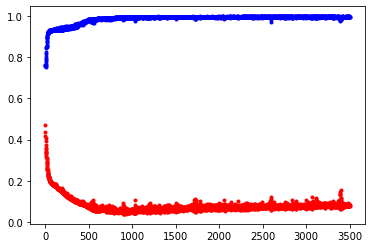

In [59]:
#################그래프로 학습 확인하기#############################

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv(goal_path/'wine.csv', header=None)
df = df_pre.sample(frac=0.15)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
from keras.callbacks import ModelCheckpoint

# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = root_path/'datas/실습/output/12월/31일/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다
# 모델 저장 조건 설정
modelpath=MODEL_DIR/"{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋(33%)으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv(goal_path/'wine.csv', header=None)
df = df_pre.sample(frac=0.15)  #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# 모델 컴파일
model.compile(loss='binary_crossentropy',   optimizer='adam',    metrics=['accuracy'])


# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

from keras.callbacks import EarlyStopping

# 자동 중단 설정(EarlyStopping() 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지를 정합니다.)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 1s 858us/step - loss: 0.5458 - accuracy: 0.7654 - val_loss: 0.4857 - val_accuracy: 0.7744
Epoch 2/2000
780/780 [==============================] - 0s 47us/step - loss: 0.4876 - accuracy: 0.7654 - val_loss: 0.4598 - val_accuracy: 0.7744
Epoch 3/2000
780/780 [==============================] - 0s 45us/step - loss: 0.4526 - accuracy: 0.7641 - val_loss: 0.4339 - val_accuracy: 0.7744
Epoch 4/2000
780/780 [==============================] - 0s 38us/step - loss: 0.4226 - accuracy: 0.7654 - val_loss: 0.4204 - val_accuracy: 0.7641
Epoch 5/2000
780/780 [==============================] - 0s 40us/step - loss: 0.4069 - accuracy: 0.7641 - val_loss: 0.4077 - val_accuracy: 0.7692
Epoch 6/2000
780/780 [==============================] - 0s 37us/step - loss: 0.3882 - accuracy: 0.7692 - val_loss: 0.3945 - val_accuracy: 0.7846
Epoch 7/2000
780/780 [==============================] - 0s 13us/step - loss: 0.3741

Epoch 57/2000
780/780 [==============================] - 0s 12us/step - loss: 0.1957 - accuracy: 0.9346 - val_loss: 0.2200 - val_accuracy: 0.9333
Epoch 58/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1944 - accuracy: 0.9346 - val_loss: 0.2185 - val_accuracy: 0.9333
Epoch 59/2000
780/780 [==============================] - 0s 41us/step - loss: 0.1938 - accuracy: 0.9359 - val_loss: 0.2170 - val_accuracy: 0.9333
Epoch 60/2000
780/780 [==============================] - 0s 12us/step - loss: 0.1924 - accuracy: 0.9346 - val_loss: 0.2166 - val_accuracy: 0.9333
Epoch 61/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1919 - accuracy: 0.9359 - val_loss: 0.2166 - val_accuracy: 0.9385
Epoch 62/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1913 - accuracy: 0.9359 - val_loss: 0.2134 - val_accuracy: 0.9333
Epoch 63/2000
780/780 [==============================] - 0s 9us/step - loss: 0.1897 - accuracy: 0.9372 - val_loss: 0.2109 - v

Epoch 169/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1332 - accuracy: 0.9423 - val_loss: 0.1383 - val_accuracy: 0.9487
Epoch 170/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1323 - accuracy: 0.9410 - val_loss: 0.1436 - val_accuracy: 0.9487
Epoch 171/2000
780/780 [==============================] - 0s 15us/step - loss: 0.1316 - accuracy: 0.9410 - val_loss: 0.1457 - val_accuracy: 0.9487
Epoch 172/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1318 - accuracy: 0.9462 - val_loss: 0.1409 - val_accuracy: 0.9487
Epoch 173/2000
780/780 [==============================] - 0s 11us/step - loss: 0.1310 - accuracy: 0.9410 - val_loss: 0.1394 - val_accuracy: 0.9487
Epoch 174/2000
780/780 [==============================] - 0s 10us/step - loss: 0.1299 - accuracy: 0.9410 - val_loss: 0.1420 - val_accuracy: 0.9487
Epoch 175/2000
780/780 [==============================] - 0s 12us/step - loss: 0.1301 - accuracy: 0.9423 - val_loss: 0

Epoch 280/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0962 - accuracy: 0.9564 - val_loss: 0.1085 - val_accuracy: 0.9487
Epoch 281/2000
780/780 [==============================] - 0s 17us/step - loss: 0.0959 - accuracy: 0.9590 - val_loss: 0.1105 - val_accuracy: 0.9487
Epoch 282/2000
780/780 [==============================] - 0s 32us/step - loss: 0.0958 - accuracy: 0.9551 - val_loss: 0.1121 - val_accuracy: 0.9487
Epoch 283/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0957 - accuracy: 0.9538 - val_loss: 0.1114 - val_accuracy: 0.9487
Epoch 284/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0956 - accuracy: 0.9526 - val_loss: 0.1084 - val_accuracy: 0.9538
Epoch 285/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0952 - accuracy: 0.9577 - val_loss: 0.1093 - val_accuracy: 0.9487
Epoch 286/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0950 - accuracy: 0.9551 - val_loss: 0

Epoch 336/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0870 - accuracy: 0.9564 - val_loss: 0.1003 - val_accuracy: 0.9538
Epoch 337/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0827 - accuracy: 0.9641 - val_loss: 0.0917 - val_accuracy: 0.9692
Epoch 338/2000
780/780 [==============================] - 0s 14us/step - loss: 0.0871 - accuracy: 0.9654 - val_loss: 0.0962 - val_accuracy: 0.9590
Epoch 339/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0825 - accuracy: 0.9628 - val_loss: 0.1050 - val_accuracy: 0.9487
Epoch 340/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0838 - accuracy: 0.9603 - val_loss: 0.0967 - val_accuracy: 0.9590
Epoch 341/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0813 - accuracy: 0.9705 - val_loss: 0.0935 - val_accuracy: 0.9590
Epoch 342/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0823 - accuracy: 0.9692 - val_loss: 0

Epoch 392/2000
780/780 [==============================] - 0s 46us/step - loss: 0.0718 - accuracy: 0.9756 - val_loss: 0.0886 - val_accuracy: 0.9590
Epoch 393/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0710 - accuracy: 0.9756 - val_loss: 0.0857 - val_accuracy: 0.9641
Epoch 394/2000
780/780 [==============================] - 0s 28us/step - loss: 0.0719 - accuracy: 0.9718 - val_loss: 0.0837 - val_accuracy: 0.9692
Epoch 395/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0697 - accuracy: 0.9756 - val_loss: 0.0929 - val_accuracy: 0.9538
Epoch 396/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0718 - accuracy: 0.9667 - val_loss: 0.0884 - val_accuracy: 0.9590
Epoch 397/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0700 - accuracy: 0.9744 - val_loss: 0.0810 - val_accuracy: 0.9795
Epoch 398/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0717 - accuracy: 0.9692 - val_loss: 0.0

Epoch 448/2000
780/780 [==============================] - 0s 8us/step - loss: 0.0597 - accuracy: 0.9795 - val_loss: 0.0733 - val_accuracy: 0.9795
Epoch 449/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 450/2000
780/780 [==============================] - 0s 47us/step - loss: 0.0600 - accuracy: 0.9795 - val_loss: 0.0825 - val_accuracy: 0.9590
Epoch 451/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0601 - accuracy: 0.9795 - val_loss: 0.0746 - val_accuracy: 0.9795
Epoch 452/2000
780/780 [==============================] - 0s 27us/step - loss: 0.0600 - accuracy: 0.9821 - val_loss: 0.0732 - val_accuracy: 0.9795
Epoch 453/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0595 - accuracy: 0.9795 - val_loss: 0.0808 - val_accuracy: 0.9590
Epoch 454/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.0

Epoch 504/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.0844 - val_accuracy: 0.9590
Epoch 505/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0546 - accuracy: 0.9769 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 506/2000
780/780 [==============================] - 0s 44us/step - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0674 - val_accuracy: 0.9846
Epoch 507/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0741 - val_accuracy: 0.9692
Epoch 508/2000
780/780 [==============================] - 0s 15us/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0764 - val_accuracy: 0.9641
Epoch 509/2000
780/780 [==============================] - 0s 14us/step - loss: 0.0503 - accuracy: 0.9885 - val_loss: 0.0681 - val_accuracy: 0.9846
Epoch 510/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0517 - accuracy: 0.9859 - val_loss: 0.0

Epoch 560/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0434 - accuracy: 0.9872 - val_loss: 0.0666 - val_accuracy: 0.9846
Epoch 561/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0699 - val_accuracy: 0.9846
Epoch 562/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0676 - val_accuracy: 0.9846
Epoch 563/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0426 - accuracy: 0.9885 - val_loss: 0.0664 - val_accuracy: 0.9846
Epoch 564/2000
780/780 [==============================] - 0s 42us/step - loss: 0.0425 - accuracy: 0.9885 - val_loss: 0.0685 - val_accuracy: 0.9846
Epoch 565/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0424 - accuracy: 0.9885 - val_loss: 0.0679 - val_accuracy: 0.9846
Epoch 566/2000
780/780 [==============================] - 0s 22us/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.

Epoch 616/2000
780/780 [==============================] - 0s 15us/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0733 - val_accuracy: 0.9744
Epoch 617/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.0642 - val_accuracy: 0.9846
Epoch 618/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0634 - val_accuracy: 0.9846
Epoch 619/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0367 - accuracy: 0.9872 - val_loss: 0.0685 - val_accuracy: 0.9795
Epoch 620/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0693 - val_accuracy: 0.9795
Epoch 621/2000
780/780 [==============================] - 0s 15us/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0639 - val_accuracy: 0.9846
Epoch 622/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.

Epoch 672/2000
780/780 [==============================] - 0s 35us/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0567 - val_accuracy: 0.9846
Epoch 673/2000
780/780 [==============================] - 0s 11us/step - loss: 0.0286 - accuracy: 0.9897 - val_loss: 0.0604 - val_accuracy: 0.9846
Epoch 674/2000
780/780 [==============================] - 0s 23us/step - loss: 0.0289 - accuracy: 0.9897 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 675/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0577 - val_accuracy: 0.9846
Epoch 676/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0552 - val_accuracy: 0.9846
Epoch 677/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0536 - val_accuracy: 0.9846
Epoch 678/2000
780/780 [==============================] - 0s 40us/step - loss: 0.0295 - accuracy: 0.9923 - val_loss: 0.0

Epoch 728/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0233 - accuracy: 0.9949 - val_loss: 0.0711 - val_accuracy: 0.9846
Epoch 729/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0634 - val_accuracy: 0.9846
Epoch 730/2000
780/780 [==============================] - 0s 10us/step - loss: 0.0202 - accuracy: 0.9962 - val_loss: 0.0625 - val_accuracy: 0.9795
Epoch 731/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0223 - accuracy: 0.9936 - val_loss: 0.0681 - val_accuracy: 0.9846
Epoch 732/2000
780/780 [==============================] - 0s 32us/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0656 - val_accuracy: 0.9846
Epoch 733/2000
780/780 [==============================] - 0s 9us/step - loss: 0.0205 - accuracy: 0.9974 - val_loss: 0.0659 - val_accuracy: 0.9846
Epoch 734/2000
780/780 [==============================] - 0s 12us/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0

975/975 [==============================] - 0s 22us/step

 Accuracy: 0.9897


In [1]:
print(test_acc)

NameError: name 'test_acc' is not defined